<a href="https://colab.research.google.com/github/SriDhar00/Customer-Log-Information/blob/main/DataScienceipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

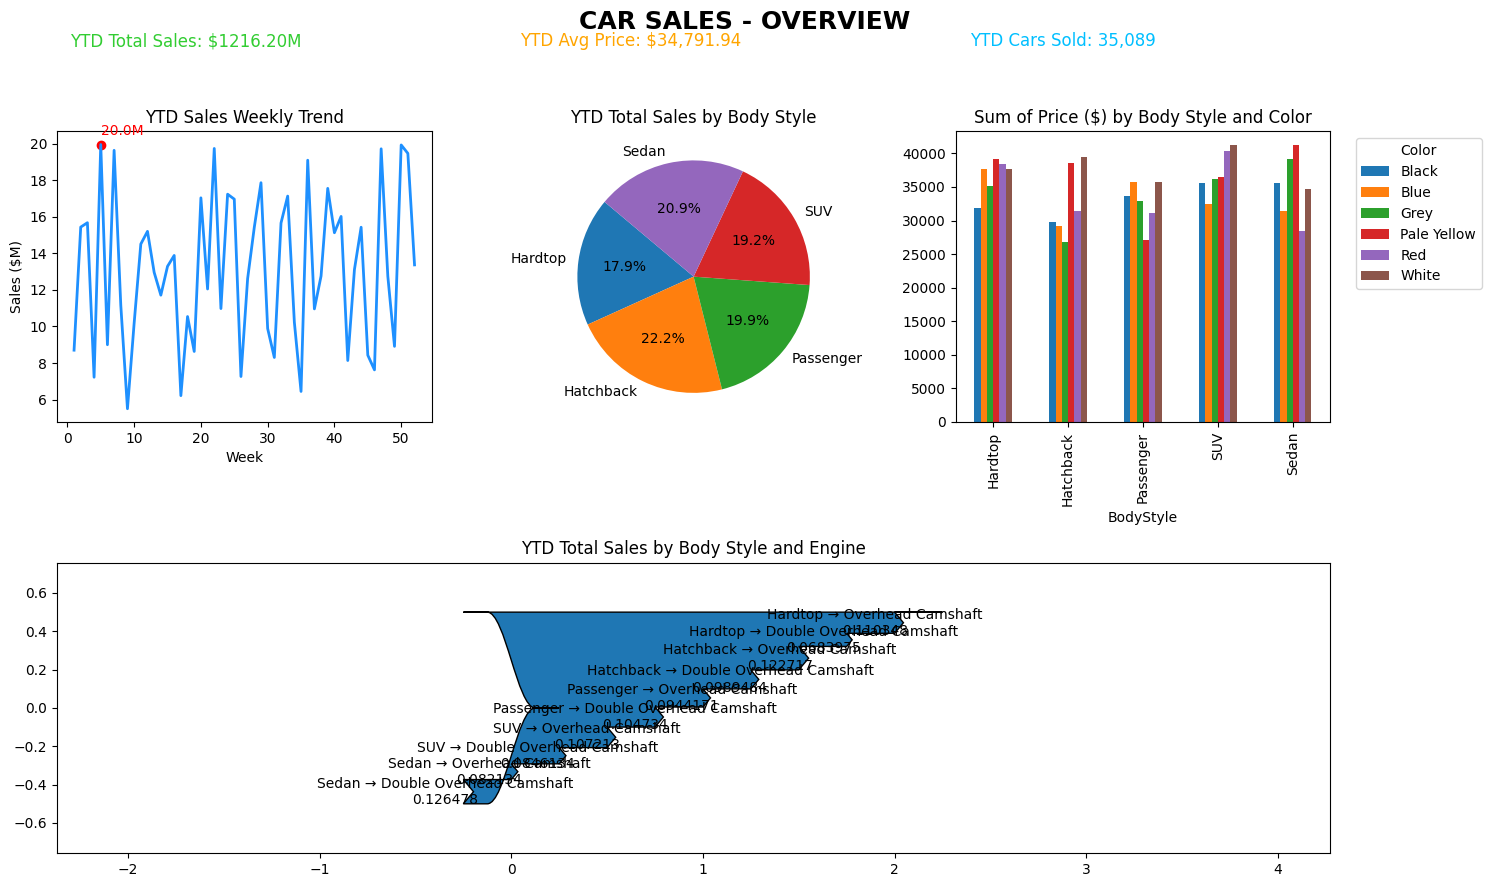

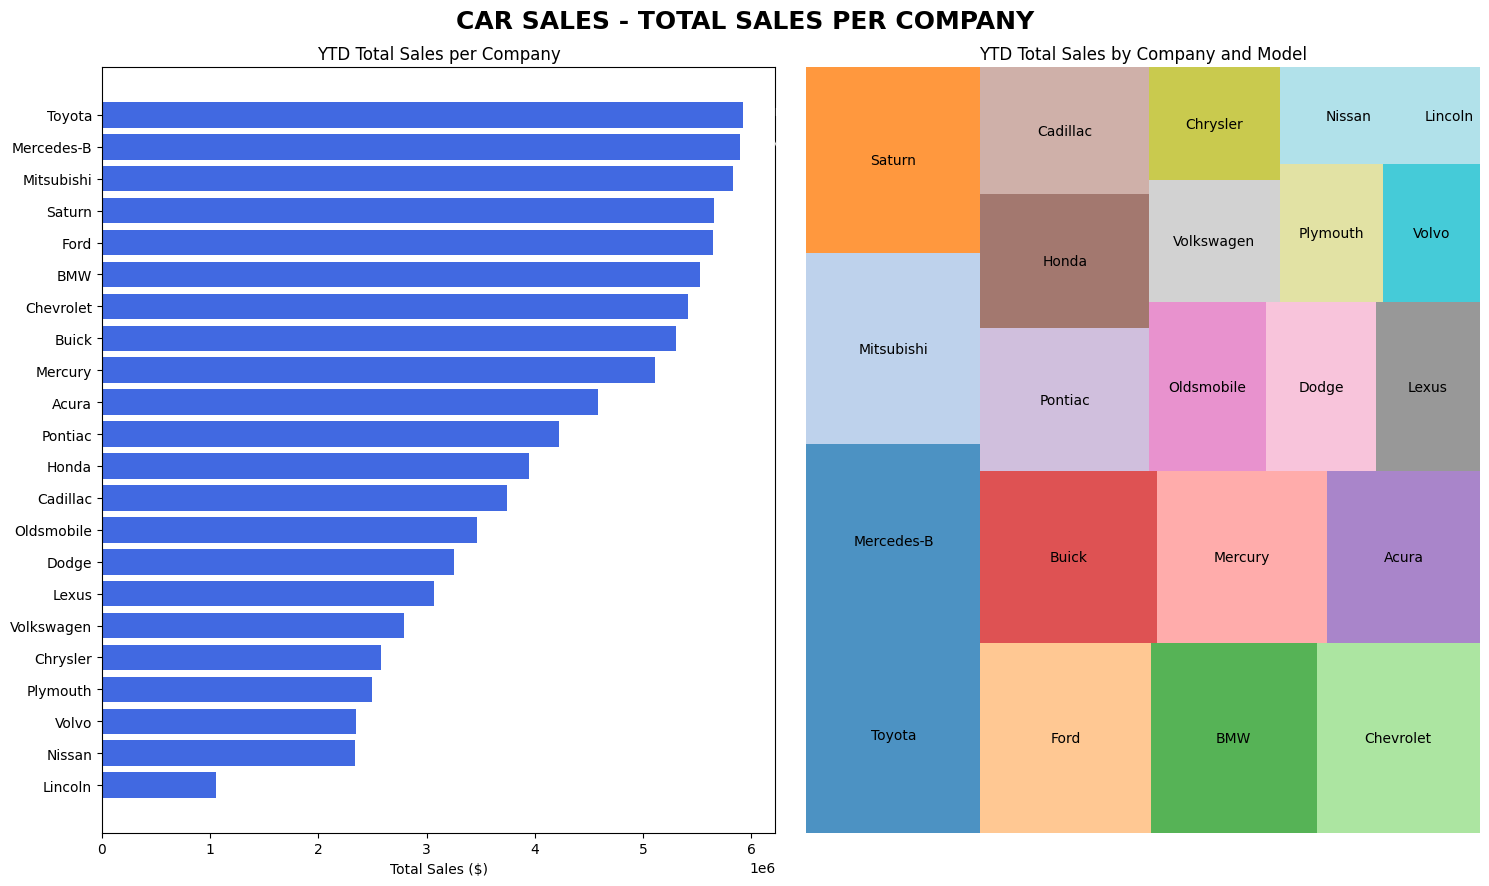

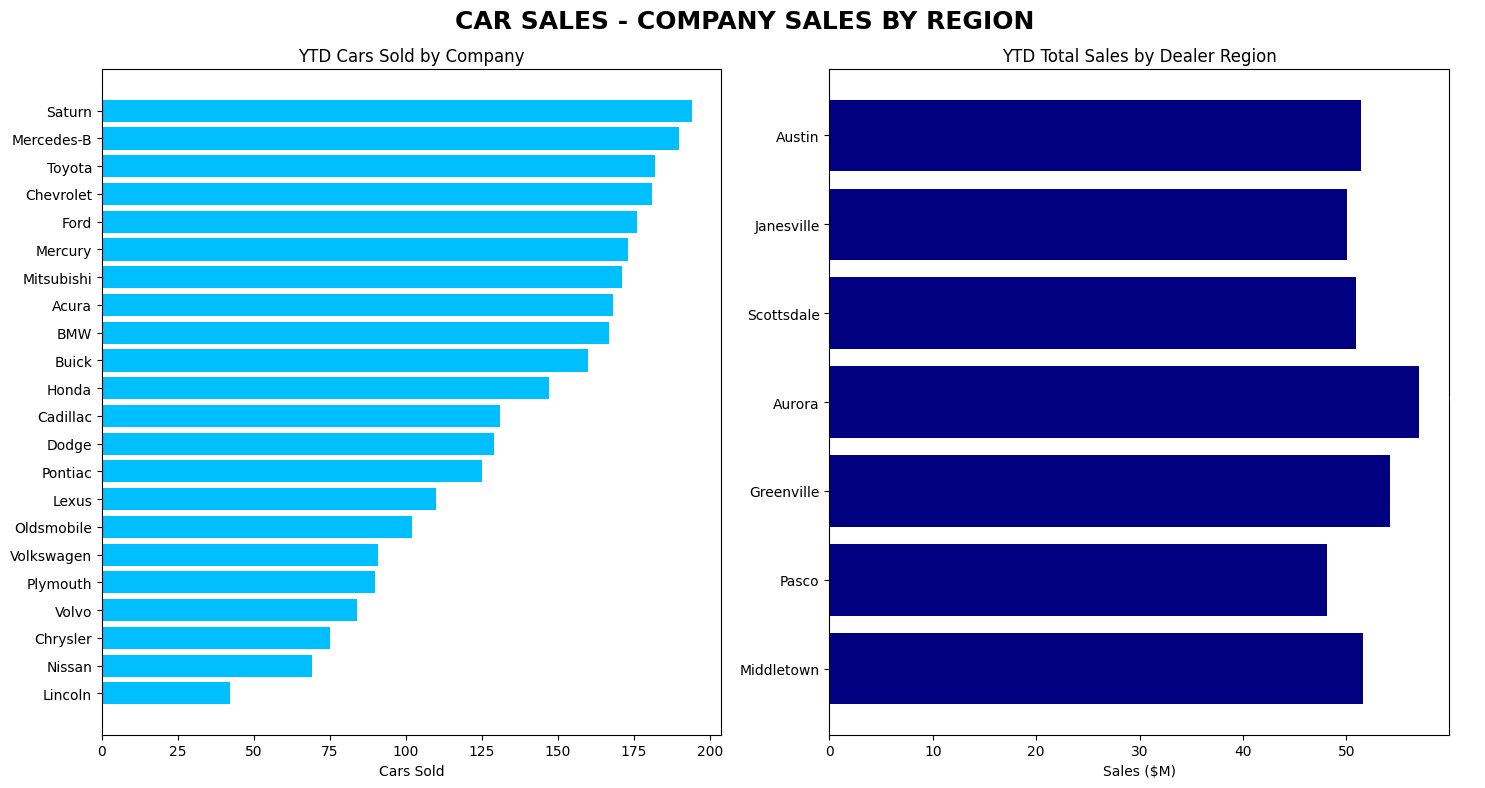

In [3]:

!pip install squarify --quiet


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import squarify


np.random.seed(42)

body_styles = ['SUV', 'Hatchback', 'Sedan', 'Passenger', 'Hardtop']
engines = ['Overhead Camshaft', 'Double Overhead Camshaft']
colors = ['Red', 'Blue', 'Black', 'White', 'Grey', 'Pale Yellow']
companies = [
    'Chevrolet', 'Ford', 'Dodge', 'Oldsmobile', 'Volkswagen', 'Mitsubishi',
    'Mercedes-B', 'Toyota', 'Chrysler', 'Lexus', 'Pontiac', 'Volvo', 'Mercury',
    'Honda', 'Nissan', 'BMW', 'Cadillac', 'Acura', 'Buick', 'Lincoln', 'Saturn', 'Plymouth'
]
dealer_regions = ['Austin', 'Janesville', 'Scottsdale', 'Aurora', 'Greenville', 'Pasco', 'Middletown']


data_body = []
for b in body_styles:
    for c in colors:
        for e in engines:
            sales = np.random.randint(200, 1000)
            price = np.random.uniform(25000, 45000)
            data_body.append([b, c, e, sales, price])
df_body = pd.DataFrame(data_body, columns=['BodyStyle', 'Color', 'Engine', 'CarsSold', 'Price'])


data_company = []
for comp in companies:
    ytd_cars = np.random.randint(40, 200)
    avg_price = np.random.uniform(25000, 35000)
    total_sales = ytd_cars * avg_price
    data_company.append([comp, ytd_cars, avg_price, total_sales])
df_company = pd.DataFrame(data_company, columns=['Company', 'YTD Cars Sold', 'YTD Avg Price', 'YTD Total Sales'])
df_company['%GT YTD Total Sales'] = 100 * df_company['YTD Total Sales'] / df_company['YTD Total Sales'].sum()


data_region = []
for region in dealer_regions:
    region_sales = np.random.uniform(47, 65)
    data_region.append([region, region_sales])
df_region = pd.DataFrame(data_region, columns=['Dealer Region', 'Sales (M)'])


weeks = np.arange(1, 53)
sales_weekly = np.random.uniform(5, 20, size=52)


ytd_total_sales = (df_body['CarsSold'] * df_body['Price']).sum() / 1e6
ytd_avg_price = df_body['Price'].mean()
ytd_cars_sold = df_body['CarsSold'].sum()


fig1 = plt.figure(figsize=(15, 9))
fig1.suptitle("CAR SALES - OVERVIEW", fontsize=18, fontweight='bold')


ax1 = plt.subplot2grid((2, 3), (0, 0))
ax1.plot(weeks, sales_weekly, color='dodgerblue', linewidth=2)
ax1.set_title('YTD Sales Weekly Trend')
ax1.set_xlabel('Week')
ax1.set_ylabel('Sales ($M)')
max_week = np.argmax(sales_weekly)
ax1.scatter(max_week+1, sales_weekly[max_week], color='red')
ax1.text(max_week+1, sales_weekly[max_week]+0.5, f"{sales_weekly[max_week]:.1f}M", color='red')


ax2 = plt.subplot2grid((2, 3), (0, 1))
sales_by_body = df_body.groupby('BodyStyle')['CarsSold'].sum()
ax2.pie(sales_by_body, labels=sales_by_body.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('YTD Total Sales by Body Style')


ax3 = plt.subplot2grid((2, 3), (0, 2))
pivot = df_body.pivot_table(values='Price', index='BodyStyle', columns='Color', aggfunc='mean')
pivot.plot(kind='bar', ax=ax3)
ax3.set_title('Sum of Price ($) by Body Style and Color')
ax3.legend(title='Color', bbox_to_anchor=(1.05, 1))


ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=3)
body_engine_sales = df_body.groupby(['BodyStyle', 'Engine'])['CarsSold'].sum().unstack()
flows, labels, orientations = [], [], []
total_sales = body_engine_sales.sum().sum()
for i, row in body_engine_sales.iterrows():
    for e in engines:
        flows.append(row[e] / total_sales)
        labels.append(f"{i} → {e}")
        orientations.append(0)
Sankey(ax=ax4, flows=flows, labels=labels, orientations=orientations).finish()
ax4.set_title("YTD Total Sales by Body Style and Engine")

fig1.text(0.05, 0.94, f"YTD Total Sales: ${ytd_total_sales:.2f}M", fontsize=12, color='limegreen')
fig1.text(0.35, 0.94, f"YTD Avg Price: ${ytd_avg_price:,.2f}", fontsize=12, color='orange')
fig1.text(0.65, 0.94, f"YTD Cars Sold: {ytd_cars_sold:,}", fontsize=12, color='deepskyblue')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


fig2 = plt.figure(figsize=(15, 9))
fig2.suptitle("CAR SALES - TOTAL SALES PER COMPANY", fontsize=18, fontweight='bold')


ax5 = plt.subplot(121)
df_sorted = df_company.sort_values(by='YTD Total Sales', ascending=False)
ax5.barh(df_sorted['Company'], df_sorted['YTD Total Sales'], color='royalblue')
ax5.set_title('YTD Total Sales per Company')
ax5.set_xlabel('Total Sales ($)')
ax5.invert_yaxis()
for i, v in enumerate(df_sorted['YTD Total Sales']):
    ax5.text(v, i, f"${v/1e6:.2f}M", color='white', fontsize=8)


ax6 = plt.subplot(122)
sizes = df_sorted['YTD Total Sales']
colors_list = plt.cm.tab20(np.linspace(0, 1, len(companies)))
squarify.plot(sizes=sizes, label=df_sorted['Company'], color=colors_list, alpha=.8, ax=ax6)
ax6.set_title("YTD Total Sales by Company and Model")
ax6.axis('off')

plt.tight_layout()
plt.show()


fig3 = plt.figure(figsize=(15, 8))
fig3.suptitle("CAR SALES - COMPANY SALES BY REGION", fontsize=18, fontweight='bold')


ax7 = plt.subplot(121)
df_sorted2 = df_company.sort_values(by='YTD Cars Sold', ascending=False)
ax7.barh(df_sorted2['Company'], df_sorted2['YTD Cars Sold'], color='deepskyblue')
ax7.set_title('YTD Cars Sold by Company')
ax7.set_xlabel('Cars Sold')
ax7.invert_yaxis()

ax8 = plt.subplot(122)
ax8.barh(df_region['Dealer Region'], df_region['Sales (M)'], color='navy')
for i, v in enumerate(df_region['Sales (M)']):
    ax8.text(v + 0.2, i, f"${v:.2f}M", color='white', fontsize=9)
ax8.set_title('YTD Total Sales by Dealer Region')
ax8.set_xlabel('Sales ($M)')
ax8.invert_yaxis()

plt.tight_layout()
plt.show()
